In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
data=pd.read_csv("predictive_maintenance.csv")


#grabbing a peek at the data
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# dropping columns of UDI and Product ID 
data1=data.drop("UDI",axis=1)
data2=data1
data3=data2.drop("Product ID",axis=1)
data3.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [6]:
# checking for null values in dataset
data3.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [7]:
# checing for duplicate values in dataset
data3.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
# accessing types of failures corresponding to respective targets
data3.groupby(['Target','Failure Type']).count().drop(['Process temperature [K]',
                                                      'Rotational speed [rpm]',
                                                     'Torque [Nm]',
                                                     'Tool wear [min]',
                                                      'Air temperature [K]'],axis=1).rename(columns = {'Type':'count'})

count
Target Failure Type                   
0      No Failure                 9643
       Random Failures              18
1      Heat Dissipation Failure    112
       No Failure                    9
       Overstrain Failure           78
       Power Failure                95
       Tool Wear Failure            45

In [9]:
# converting string data to numeric data
from sklearn.preprocessing import OrdinalEncoder
data3['Type'].unique()
enc= OrdinalEncoder()
enc.fit_transform(data1[['Type']])
data3[['Type']]=enc.fit_transform(data1[['Type']])
data3['Failure Type'].unique()
enc.fit_transform(data1[['Failure Type']])
data3[['Failure Type']]=enc.fit_transform(data1[['Failure Type']])
print(data3)

      Type  Air temperature [K]  Process temperature [K]  \
0      2.0                298.1                    308.6   
1      1.0                298.2                    308.7   
2      1.0                298.1                    308.5   
3      1.0                298.2                    308.6   
4      1.0                298.2                    308.7   
...    ...                  ...                      ...   
9995   2.0                298.8                    308.4   
9996   0.0                298.9                    308.4   
9997   2.0                299.0                    308.6   
9998   0.0                299.0                    308.7   
9999   2.0                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   

In [10]:
data3.groupby(['Type','Target']).median()

Air temperature [K]  Process temperature [K]  \
Type Target                                                 
0.0  0                     299.7                    309.9   
     1                     302.0                    310.2   
1.0  0                     300.1                    310.1   
     1                     301.2                    310.4   
2.0  0                     300.1                    310.0   
     1                     302.0                    310.6   

             Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Type Target                                                         
0.0  0                       1502.0         40.2            106.0   
     1                       1371.0         53.8            147.0   
1.0  0                       1508.0         39.7            107.0   
     1                       1362.0         53.9            182.0   
2.0  0                       1506.0         40.0            105.0   
     1                       1372.0         51.6            125.0   

             Failure Type  
Type Target                
0.0  0                1.0  
     1                3.0  
1.0  0                1.0  
     1                2.0  
2.0  0                1.0  
     1                3.0

<Axes: xlabel='Target', ylabel='count'>

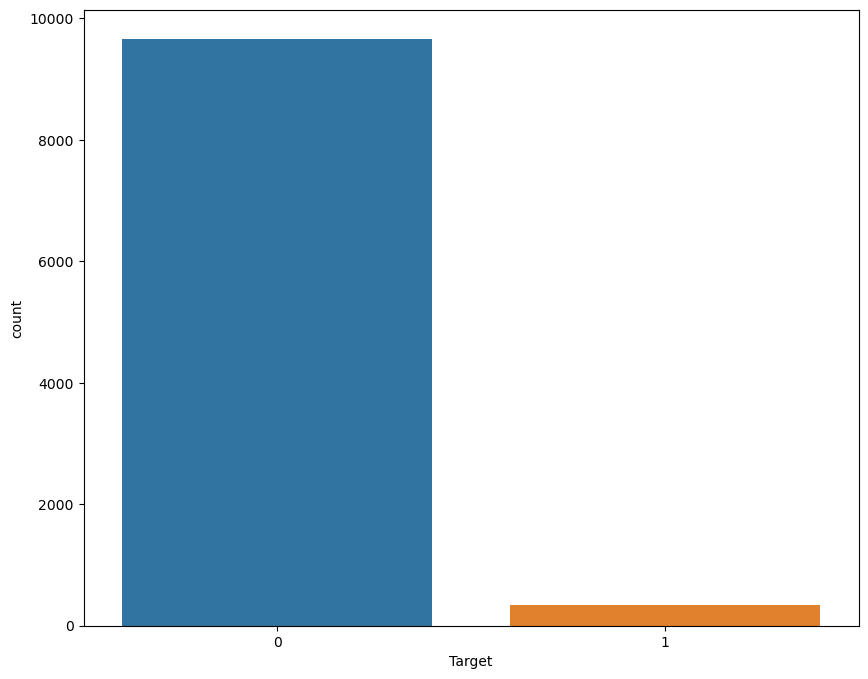

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(data=data3,x="Target")

<Axes: xlabel='Failure Type', ylabel='count'>

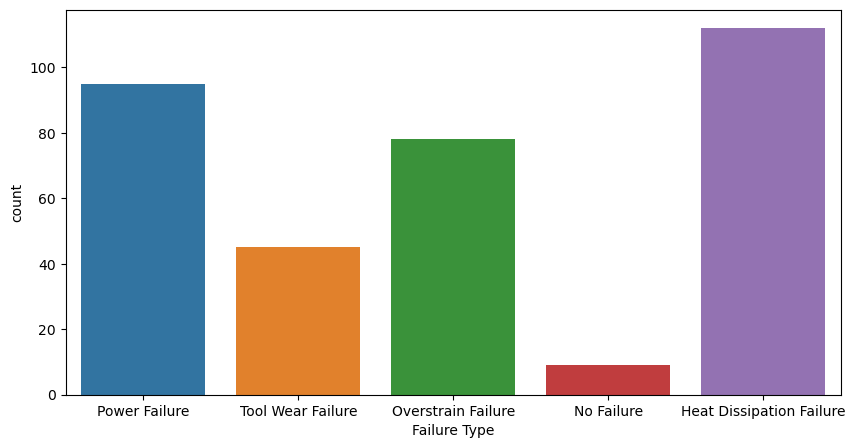

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")

<Axes: xlabel='Type', ylabel='count'>

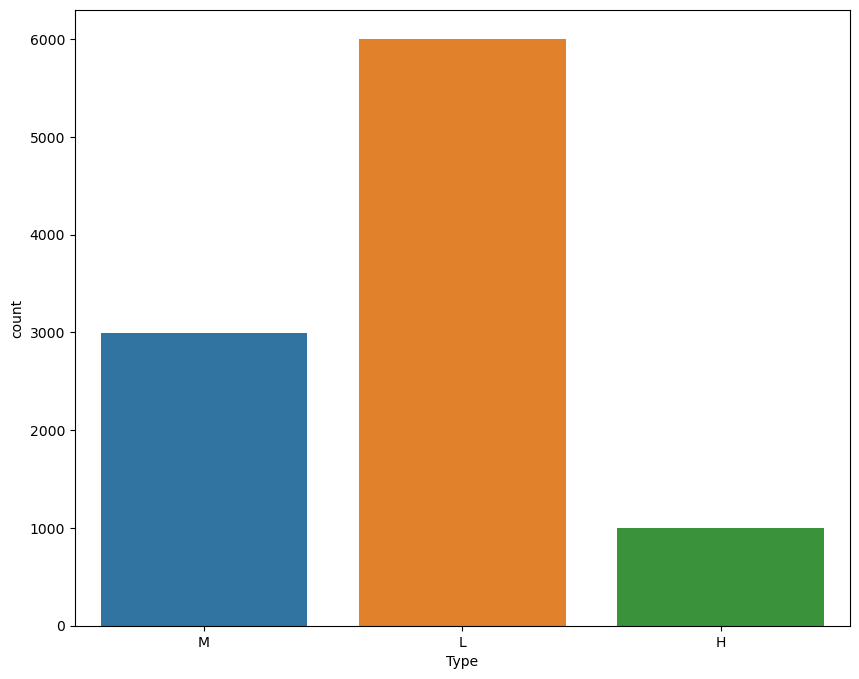

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Type")

In [14]:
def feat_prob(feature,data3):
    x,y = [],[]
    for j in data3[feature].unique():
        temp = data3
        temp = temp[temp[feature]>=j]
        y.append(round((temp.Target.mean()*100),2))
        x.append(j)
    return(x,y)

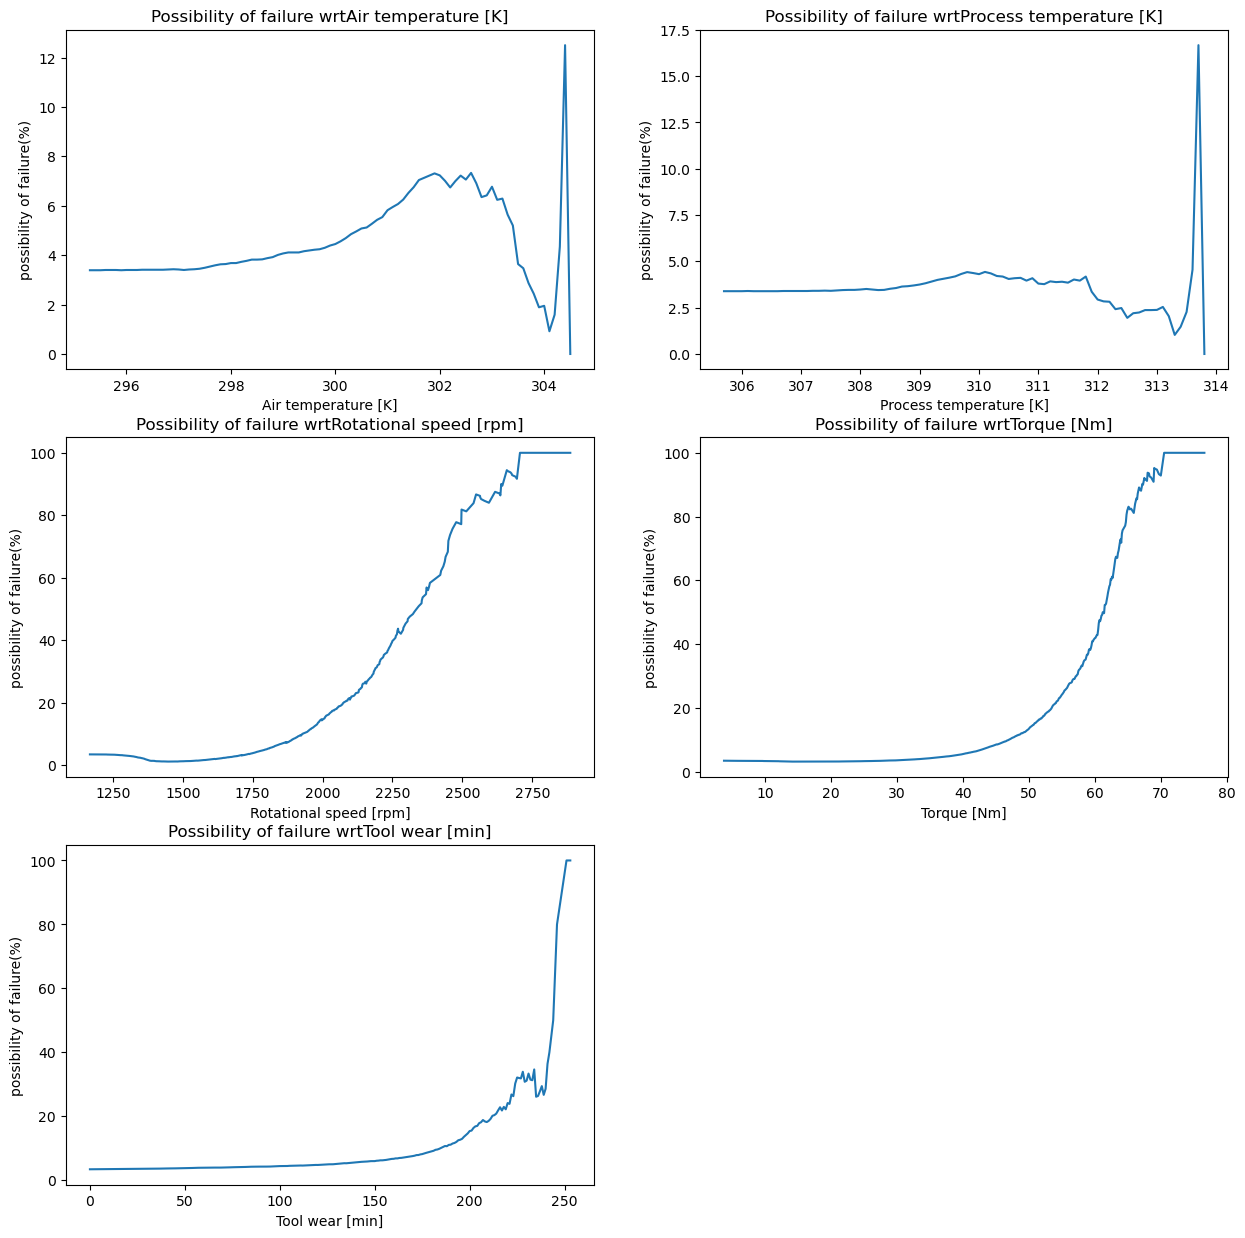

In [15]:
plt.figure(figsize=(15,15))
m=1
for i in ['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']:
    plt.subplot(3,2,m).set_title(label=("Possibility of failure wrt"s+i))
    x,y=feat_prob(i,data)
    plt.xlabel(i)
    plt.ylabel("possibility of failure(%)")
    sns.lineplot(y=y,x=x)
    m+=1

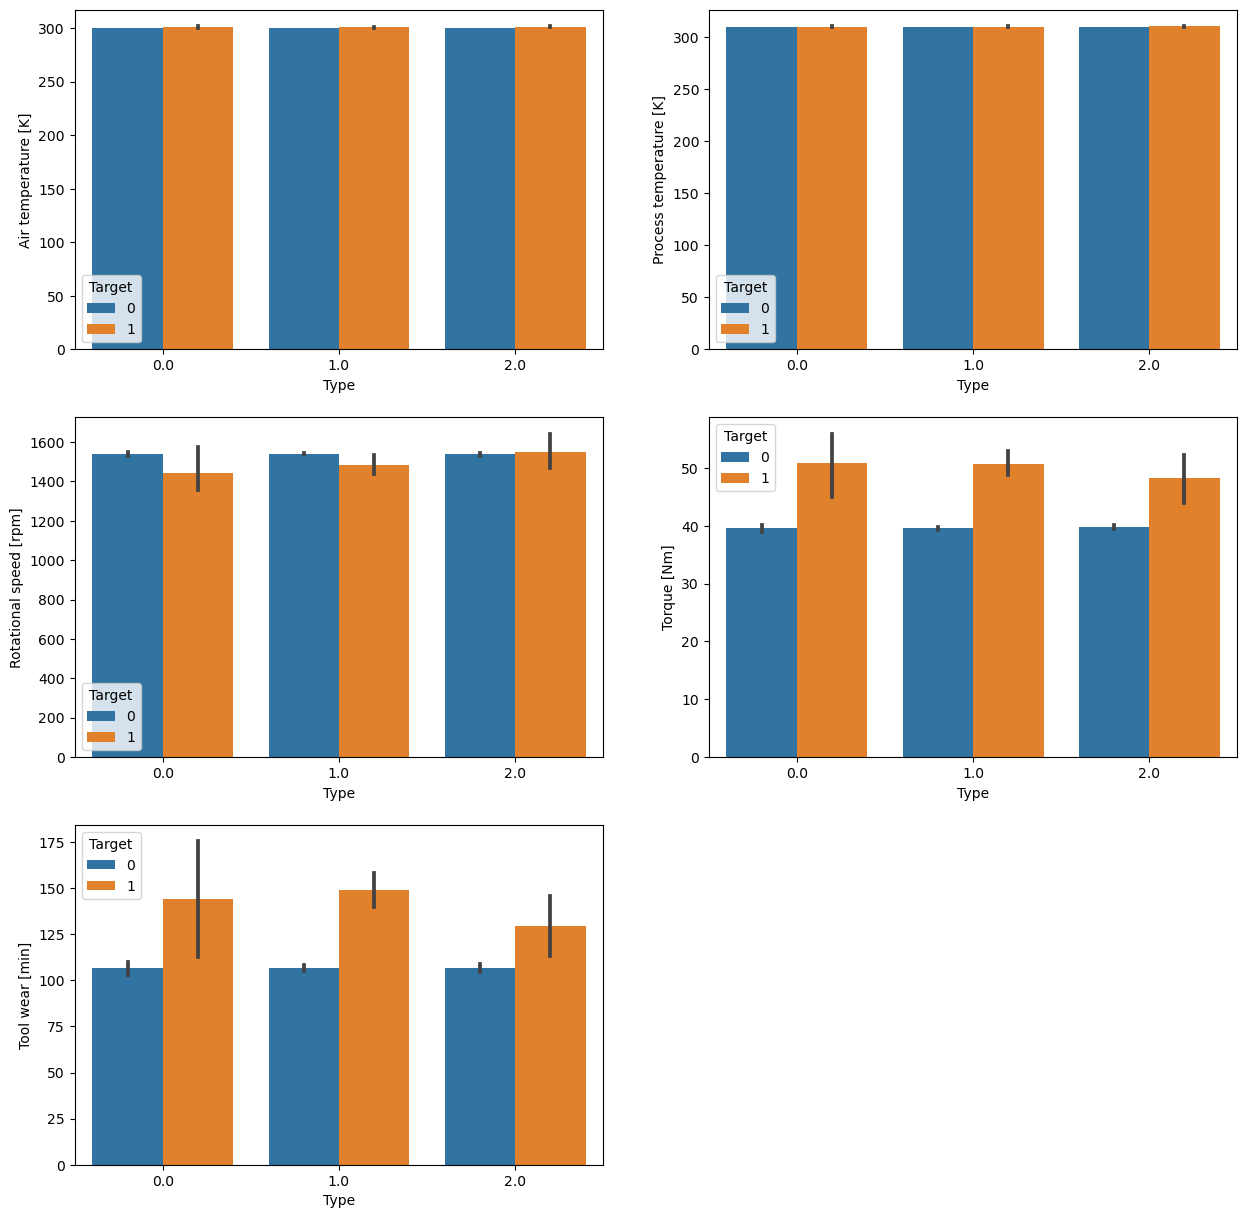

In [34]:
plt.figure(figsize = (15,15))
m=1
for i in ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'] :
    plt.subplot(3,2,m)
    sns.barplot(data=data3,y=i,x="Type",hue="Target")
    m+=1

In [17]:
X=data3.drop(['Failure Type','Target'],axis=1)
Y=data3['Target']
print(X.shape)
print(Y.shape)

(10000, 6)
(10000,)


In [18]:
# getting values for processing
xData = X.values
yData= Y.values

In [19]:
from sklearn.model_selection import train_test_split
# splitting data into training and testing data set
xTrain,xTest,yTrain,yTest= train_test_split(xData,yData,test_size=0.6, random_state=1)

In [20]:
from sklearn.linear_model import LogisticRegression
# creating logistic regression model
lg=LogisticRegression()
lg.fit(xTrain,yTrain)
ypred=lg.predict(xTest)

In [21]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score,matthews_corrcoef
from sklearn.metrics import classification_report,accuracy_score
def scores():
    acc=accuracy_score(yTest,ypred)
    print("the accuracy is",acc)
    prec=precision_score(yTest,ypred)
    print("the precision score is",prec)
    rec=recall_score(yTest,ypred)
    print("the recall is",rec)
    f1=f1_score(yTest,ypred)
    print("the f1 score is",f1)
    mcc=matthews_corrcoef(yTest,ypred)
    print("the matthews correlation is",mcc)
scores()

the accuracy is 0.971
the precision score is 0.7884615384615384
the recall is 0.20098039215686275
the f1 score is 0.32031249999999994
the matthews correlation is 0.3892470008670986


In [22]:
from sklearn.ensemble import RandomForestClassifier
# creating Random Forest model
rfc= RandomForestClassifier()
rfc.fit(xTrain,yTrain)
ypred=rfc.predict(xTest)
scores()

the accuracy is 0.9825
the precision score is 0.9159663865546218
the recall is 0.5343137254901961
the f1 score is 0.674922600619195
the matthews correlation is 0.69226424778746


In [23]:
from sklearn.neighbors import KNeighborsClassifier
# creating K nearest neighbors
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(xTrain,yTrain)
ypred=knn.predict(xTest)
scores()

the accuracy is 0.9661666666666666
the precision score is 0.5063291139240507
the recall is 0.19607843137254902
the f1 score is 0.2826855123674912
the matthews correlation is 0.30104589475662086


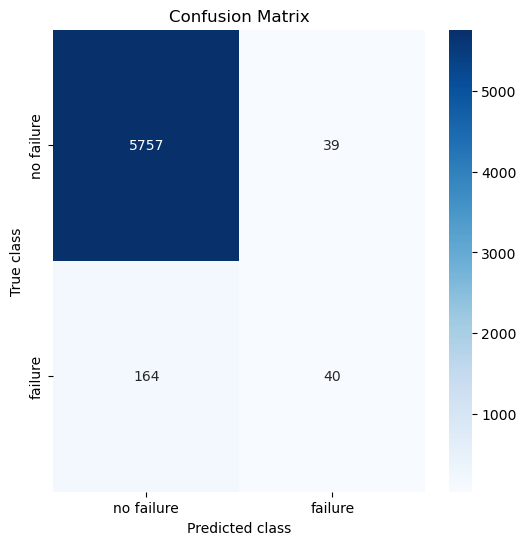

In [38]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
LABELS=['no failure','failure']
conf_matrix=confusion_matrix(yTest,ypred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix,xticklabels=LABELS,yticklabels=LABELS,annot=True,fmt='d',cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

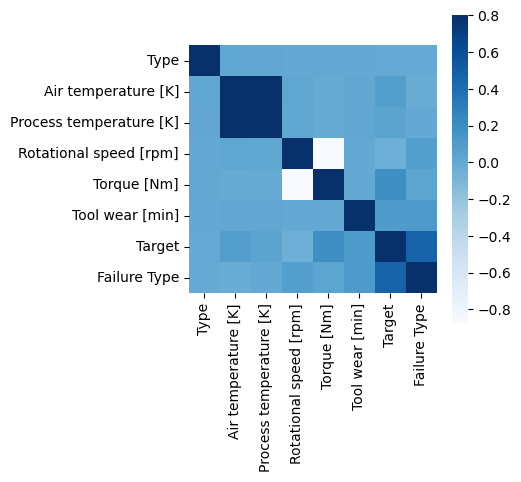

In [39]:
corrmat=data3.corr()
fig=plt.figure(figsize=(4,4))
sns.heatmap(corrmat,vmax=.8,square=True,cmap=plt.cm.Blues)
plt.show()